# Jay Mataji

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [4]:
img = cv2.imread('C:/Users/Dell/Desktop/1/Image Classification/model/test images/ko.jfif')

In [6]:
img.shape   #here last value(3) is for rgb values

(259, 194, 3)

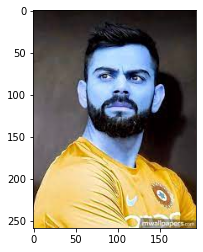

In [8]:
plt.imshow(img)

# this image are colorful coz they have rgb values

# removing that color(rgb values)

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(259, 194)

In [10]:
gray

array([[ 28,  28,  28, ...,   7,   9,   9],
       [ 28,  28,  28, ...,   7,   9,   9],
       [ 28,  28,  28, ...,   7,   9,   9],
       ...,
       [181, 173, 164, ..., 116,  98,  98],
       [181, 173, 164, ...,  88,  76,  76],
       [181, 173, 164, ...,  92,  86,  86]], dtype=uint8)

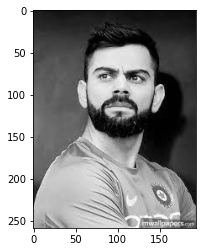

In [11]:
plt.imshow(gray , cmap='gray')

In [12]:
face_cascade = cv2.CascadeClassifier('C:/Users/Dell/Desktop/1/Image Classification/model/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Dell/Desktop/1/Image Classification/model/opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces   #(output---- (X, y, height, width))


array([[59, 44, 91, 91]], dtype=int32)

In [14]:
(x, y, w, h) = faces[0]
x, y, w, h

(59, 44, 91, 91)

# Draw red rectangle (255,0,0)--rgb and it's dimension will be is start from dimension(x,y) and then (x+w,y+h)

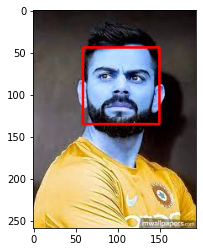

In [15]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)       

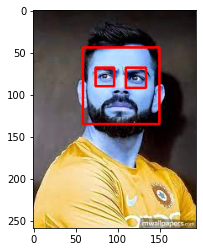

In [16]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

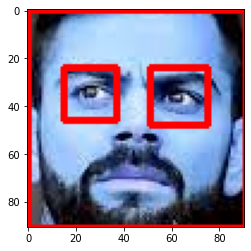

In [17]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# Creating a function which return a crop face image  from original images

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2: 
            return roi_color

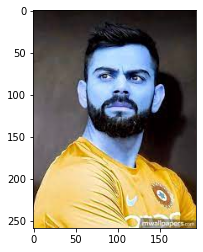

In [19]:
original_image = cv2.imread('C:/Users/Dell/Desktop/1/Image Classification/model/test images/ko.jfif')
plt.imshow(original_image)

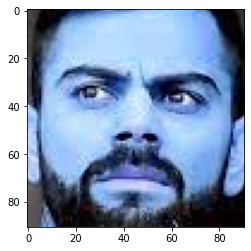

In [47]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/Dell/Desktop/1/Image Classification/model/test images/ko.jfif')
plt.imshow(cropped_image)

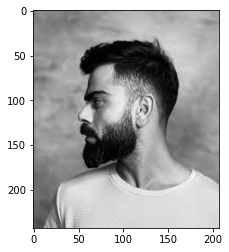

In [21]:
original_image_obstructed = cv2.imread('C:/Users/Dell/Desktop/1/Image Classification/model/test images/champion.jfif')
plt.imshow(original_image_obstructed)

In [22]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Users/Dell/Desktop/1/Image Classification/model/test images/champion.jfif')
cropped_image_no_2_eyes

In [73]:
path_to_data = './datasets/'
path_to_cr_data = './datasets/cropped/'

In [75]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [77]:
img_dirs

['./datasets/abd',
 './datasets/messi',
 './datasets/roger',
 './datasets/Roman',
 './datasets/virat kohli']

In [78]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)    #if that folder available then remove it
os.mkdir(path_to_cr_data)                  #creating a folder

In [79]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

    
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
        
    celebrity_file_names_dict[celebrity_name] = []
        
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                    
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
                
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

abd
Generating cropped images in folder:  ./datasets/cropped/abd
messi
Generating cropped images in folder:  ./datasets/cropped/messi
roger
Generating cropped images in folder:  ./datasets/cropped/roger
Roman
Generating cropped images in folder:  ./datasets/cropped/Roman
virat kohli
Generating cropped images in folder:  ./datasets/cropped/virat kohli


In [ ]:
#celebrity_file_names_dict[celebrity_name] = []    example
{
    'abd' : [
        './datasets/cropped/abd/abd1.png'
        './datasets/cropped/abd/abd2.png'
    ],
    'messi' :[
        './datasets/cropped/messi/messi1.png'
        './datasets/cropped/messi/messi2.png'
    ]
}

# wavelet transformation

In [33]:
#from stackoverflow

import numpy as np 
import cv2
import pywt

def w2d(img, mode='haar', level=1):
        imArray = img
        #Datatype conversions
        #convert to grayscale
        imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
        #convert to float
        imArray =  np.float32(imArray)   
        imArray /= 255;
        # compute coefficients 
        coeffs=pywt.wavedec2(imArray, mode, level=level)
    
        #Process Coefficients
        coeffs_H=list(coeffs)  
        coeffs_H[0] *= 0;  
    
        # reconstruction
        imArray_H=pywt.waverec2(coeffs_H, mode);
        imArray_H *= 255;
        imArray_H =  np.uint8(imArray_H)
    
        return imArray_H

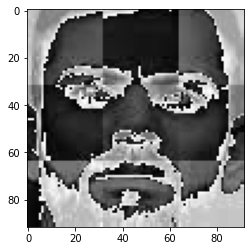

In [49]:
im_har = w2d(cropped_image,'db1',5) 
plt.imshow(im_har, cmap='gray')

In [80]:
celebrity_file_names_dict   #all cropped images

{'abd': ['./datasets/cropped/abd/abd1.png',
  './datasets/cropped/abd/abd2.png',
  './datasets/cropped/abd/abd3.png'],
 'messi': ['./datasets/cropped/messi/messi1.png',
  './datasets/cropped/messi/messi2.png',
  './datasets/cropped/messi/messi3.png',
  './datasets/cropped/messi/messi4.png',
  './datasets/cropped/messi/messi5.png'],
 'roger': ['./datasets/cropped/roger/roger1.png',
  './datasets/cropped/roger/roger2.png'],
 'Roman': ['./datasets/cropped/Roman/Roman1.png',
  './datasets/cropped/Roman/Roman2.png',
  './datasets/cropped/Roman/Roman3.png',
  './datasets/cropped/Roman/Roman4.png'],
 'virat kohli': ['./datasets/cropped/virat kohli/virat kohli1.png',
  './datasets/cropped/virat kohli/virat kohli2.png',
  './datasets/cropped/virat kohli/virat kohli3.png',
  './datasets/cropped/virat kohli/virat kohli4.png',
  './datasets/cropped/virat kohli/virat kohli5.png',
  './datasets/cropped/virat kohli/virat kohli6.png']}

In [82]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count +1
class_dict      
#we want to use celebrity name as y but we can not use str in that so we assign some number to all celebrity name

{'abd': 0, 'messi': 1, 'roger': 2, 'Roman': 3, 'virat kohli': 4}

In [85]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(cropped_image,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically image
        #(32*32*3,1)==here 3 for rgb values
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [87]:
len(X[0])  #size of image (32*32*3 + 32*32)

4096

In [88]:
X[0]

array([[168],
       [131],
       [ 66],
       ...,
       [196],
       [197],
       [197]], dtype=uint8)

In [89]:
X = np.array(X).reshape(len(X),4096).astype(float)   #converting to float
X.shape

(20, 4096)

In [90]:
X[0]   

array([168., 131.,  66., ..., 196., 197., 197.])

# Training a model

we will use SVM with rbf kernel tunned with heuristic finetuning

In [92]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#cerating pipeline to scale data
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.4

In [100]:
len(X_test)

5

In [101]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.50      0.50      0.50         2

    accuracy                           0.40         5
   macro avg       0.30      0.30      0.30         5
weighted avg       0.40      0.40      0.40         5



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# let us use GridSearchCV to try out diff models eith diff params.Aim is to find best model with best params

In [102]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [104]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf','linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [107]:
scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_,
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.666667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.466667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.466667,{'logisticregression__C': 1}


In [108]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [110]:
best_estimators['svm'].score(X_test,y_test)

0.6

In [111]:
best_estimators['random_forest'].score(X_test,y_test)

0.6

In [112]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.4

# We are using svm model

In [113]:
best_clf = best_estimators['svm']

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1]], dtype=int64)

Text(69.0, 0.5, 'Truth')

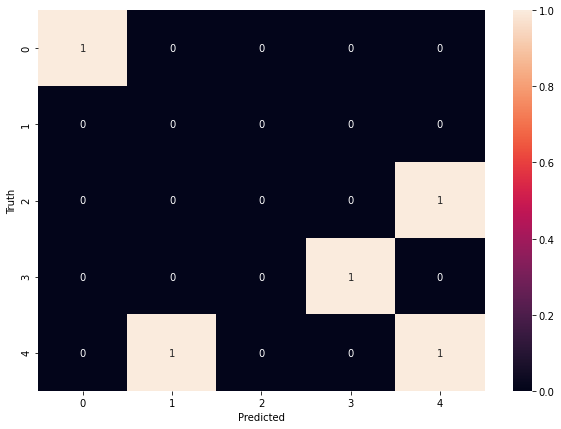

In [119]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm ,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [120]:
class_dict

{'abd': 0, 'messi': 1, 'roger': 2, 'Roman': 3, 'virat kohli': 4}

# saving a model 

In [121]:
!pip install joblib
import joblib
#save the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

# save class dictionary

In [122]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))